In [3]:
import gym
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob

from tqdm import tqdm

In [7]:
class SARSA:
    def __init__(self, env):
        self.env = env
        self.env_low = self.env.observation_space.low # 状態最小値
        self.env_high = self.env.observation_space.high #　状態最大値
        self.env_dx = (self.env_high - self.env_low) / 10
        
        self.q_table = np.zeros((10,10,10,4))
        
    def get_status(self, _observation):
        cos = int((_observation[0] - self.env_low[0])/self.env_dx[0])
        sin = int((_observation[1] - self.env_low[1])/self.env_dx[1])
        dot = int((_observation[2] - self.env_low[2])/self.env_dx[2])
        return cos, sin, dot
    
    def policy(self, s, epi):
        epsilon = 0.5 * (1 / (epi + 1))
        if np.random.random() <= epsilon:
            return [np.random.choice([-2, -1, 1, 2])]
        else:
            s1, s2, s3 = self.get_status(s)
            return [np.argmax(self.q_table[s1][s2][s3])]
    
    def learn(self, time = 200000, alpha = 0.5, gamma = 0.99):
        log = []
        t_log = []
        for j in range(time+1):
            flag = 0
            reward_flag = 0
            t = 0
            total = 0
            s = self.env.reset()
            done = False
            
            while not done:
                t += 1
                a = self.policy(s, j)
                next_s, reward, done, _ = self.env.step(a)

                if next_s[1] >= 0.95 and s[1] >= 0.95:
                  flag += 1
                elif next_s[1] >= 0.95 and s[1] < 0.95:
                  flag = 1
                elif next_s[1] < 0.95 and s[1] >= 0.95:
                  flag = 0
                elif next_s[1] < s[1] and s[1] >= 0.95:
                  reward_flag = 1

                reward += flag * 50

                if reward_flag:
                  reward -= 10000
                  break
                
                total += reward
                
                
                s1, s2, s3 = self.get_status(next_s)
                G = reward + gamma * self.q_table[s1][s2][s3][self.policy(next_s, j)]
                
                s1, s2, s3 = self.get_status(s)
                self.q_table[s1][s2][s3][a] += alpha*(G - self.q_table[s1][s2][s3][a])
                s = next_s

                if flag >= 20:
                  break

            t_log.append(t)
            log.append(total)
            if j %100 == 0:
              print(str(j) + " ===total reward=== : " + str(total))
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)
        return ax1.plot(log), ax2.plot(t_log)

    def show(self):
        s = self.env.reset()
        img = self.env.render()
        done = False
        while not done:
          a = self.policy(s, 10000)
          s, _, done, _ = self.env.step(a)
          self.env.render()
                
        self.env.reset()
        self.env.close()

0 ===total reward=== : 1042.3569920158475
100 ===total reward=== : -680.2870545849776
200 ===total reward=== : 2531.5736614738626
300 ===total reward=== : 83.13882179851517
400 ===total reward=== : 664.4492300550363
500 ===total reward=== : 11.862989986083129
600 ===total reward=== : 1186.9579894408885
700 ===total reward=== : 132.00654043299744
800 ===total reward=== : -392.82015947878
900 ===total reward=== : 155.45774783343634
1000 ===total reward=== : 2824.4734899418863


([<matplotlib.lines.Line2D at 0x14ff454d0>],
 [<matplotlib.lines.Line2D at 0x14ff45910>])

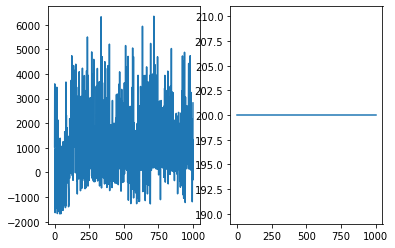

In [8]:
env = gym.make("Pendulum-v0")
agent = SARSA(env)
agent.learn(time = 1000)

In [13]:
agent.show()